Project 1- Airbnb Analysis

In [14]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
import gmaps
import numpy as np
from matplotlib import cm

In [3]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
master_df = pd.DataFrame(df)
master_df = master_df.loc[df['number_of_reviews']>1]
master_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20180827015748,2018-08-27,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,3,3.00
1,590,https://www.airbnb.com/rooms/590,20180827015748,2018-08-27,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,t,2018-BFN-O0O5791,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,4.71
2,592,https://www.airbnb.com/rooms/592,20180827015748,2018-08-27,private,Denver short-term-rental license number 2016-B...,This is a basement room. You can sometimes he...,Denver short-term-rental license number 2016-B...,none,NaN,...,t,2016-BFN-0008735,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,1.23
3,686,https://www.airbnb.com/rooms/686,20180827015748,2018-08-27,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,2016-BFN-0008368,"{""Colorado State"","" the City and County of Den...",t,f,moderate,f,f,3,1.91
4,1940,https://www.airbnb.com/rooms/1940,20180827015748,2018-08-27,Baker Studio Close to EVERYTHING,Significant discounts for week or month+ reser...,The studio is highly functional and cozy. It ...,Significant discounts for week or month+ reser...,none,Baker is a historic neighborhood with quaint V...,...,t,344114-070056 2018-BFN-0002596,"{""Colorado State"","" the City and County of Den...",f,f,strict_14_with_grace_period,f,f,1,1.08


In [4]:
df.dtypes
df_group = df.groupby('neighbourhood_cleansed')
df_group['id'].count().sort_values(ascending = False)
coordinates = df[['latitude','longitude']]
coordinates.head()

,latitude,longitude
0,39.767033,-105.002564
1,39.753609,-104.912373
2,39.754380,-104.911557
3,39.745030,-104.977564
4,39.719810,-104.996487


In [5]:
#sum of reviews
list_grouped = master_df.groupby("calculated_host_listings_count").sum()
list_grouped = list_grouped.reset_index()
list_grouped.head(20)

#count of hosts
list_grouped_host_count = master_df.groupby("calculated_host_listings_count").count()
list_grouped_host_count = list_grouped_host_count.reset_index()
list_grouped.head(20)

#average review score
list_grouped_mean_review = master_df.groupby("calculated_host_listings_count").mean()
list_grouped_mean_review = list_grouped_mean_review.reset_index()
list_grouped_mean_review.head()

,calculated_host_listings_count,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1,1.702525e+07,2.018083e+13,NaN,NaN,NaN,6.202512e+07,NaN,1.210834,1.210834,...,124.403741,43.072876,97.116270,9.879048,9.786968,9.941085,9.939914,9.793211,9.778385,2.918300
1,2,1.621952e+07,2.018083e+13,NaN,NaN,NaN,4.324971e+07,NaN,2.416079,2.416079,...,146.091678,49.535966,97.222849,9.906911,9.799718,9.946403,9.947814,9.808181,9.792666,2.887447
2,3,1.592929e+07,2.018083e+13,NaN,NaN,NaN,5.127733e+07,NaN,3.567164,3.567164,...,165.854478,53.000000,96.440299,9.805970,9.664179,9.929104,9.899254,9.750000,9.716418,3.032276
3,4,1.660657e+07,2.018083e+13,NaN,NaN,NaN,6.329319e+07,NaN,4.682171,4.682171,...,161.124031,67.031008,95.682171,9.759690,9.775194,9.875969,9.798450,9.813953,9.604651,3.883178
4,5,1.540404e+07,2.018083e+13,NaN,NaN,NaN,3.489682e+07,NaN,6.321429,6.321429,...,183.261905,64.392857,96.404762,9.869048,9.702381,9.904762,9.892857,9.738095,9.726190,3.283571


Text(0,0.5,'Number of Hosts for Listing Count')

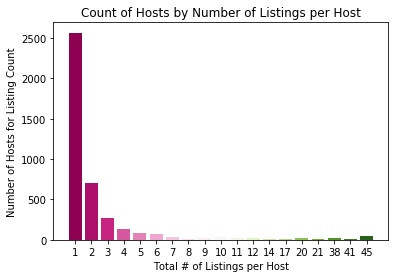

In [6]:
#calculate values. Y values are count of reviews, so pull from number of reviews column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped_host_count["id"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Count of Hosts by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Number of Hosts for Listing Count")

Text(0,0.5,'Number of Reviews for Listing Count')

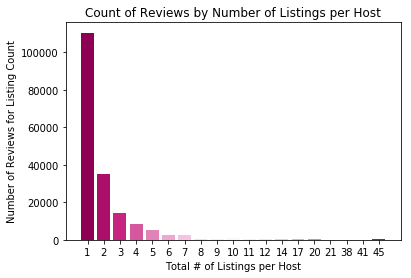

In [7]:
#calculate values. Y values are count of reviews, so pull from number of reviews column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped["number_of_reviews"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Count of Reviews by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Number of Reviews for Listing Count")

(85, 100)

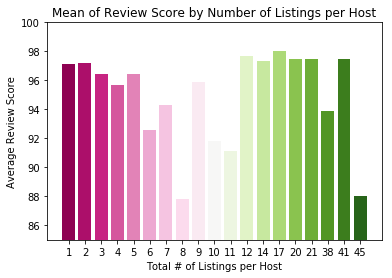

In [8]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped_mean_review["review_scores_rating"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Mean of Review Score by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Average Review Score")
plt.ylim(85, 100)

In [9]:
#Observations - 1 listing is drastically higher in number of reviews and number of actual hosts in that category than
#the the other categories. # of hosts for listing counts higher than 6 is almost negligible for trends.

In [10]:
#groupby cancellation policy

#average review by cancellation policy
cancel_review = master_df.groupby("cancellation_policy").mean()
cancel_review = cancel_review.reset_index()
cancel_review.head()

#Count of hosts by cancellation policy
cancel_review_count = master_df.groupby("cancellation_policy").count()
cancel_review_count = cancel_review_count.reset_index()
cancel_review_count.head()

#sum of reviews
cancel_sum = master_df.groupby("cancellation_policy").sum()
cancel_sum = cancel_sum.reset_index()
list_grouped.head(20)

,calculated_host_listings_count,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1,43686780412,51784002122406256,0.0,0.0,0.0,159156455037,0.0,3107,3107,...,319220,110525,248909.0,25320.0,25084.0,25479.0,25476.0,25100.0,25062.0,7485.44
1,2,11499640277,14308206354165332,0.0,0.0,0.0,30664042637,0.0,1713,1713,...,103579,35121,68931.0,7024.0,6948.0,7052.0,7053.0,6954.0,6943.0,2047.20
2,3,4269048746,5408461640220464,0.0,0.0,0.0,13742323725,0.0,956,956,...,44449,14204,25846.0,2628.0,2590.0,2661.0,2653.0,2613.0,2604.0,812.65
3,4,2142247369,2603326685031492,0.0,0.0,0.0,8164821790,0.0,604,604,...,20785,8647,12343.0,1259.0,1261.0,1274.0,1264.0,1266.0,1239.0,500.93
4,5,1293939366,1695189469322832,0.0,0.0,0.0,2931332635,0.0,531,531,...,15394,5409,8098.0,829.0,815.0,832.0,831.0,818.0,817.0,275.82
5,6,1256624089,1392477064086612,0.0,0.0,0.0,4562801668,0.0,742,742,...,15201,2722,6388.0,653.0,650.0,667.0,662.0,658.0,639.0,227.86
6,7,489192684,686148118535432,0.0,0.0,0.0,1575081546,0.0,335,335,...,10370,2823,3205.0,326.0,326.0,332.0,331.0,318.0,321.0,135.55
7,8,182531937,242169924188976,0.0,0.0,0.0,503087814,0.0,283,283,...,4223,561,1054.0,109.0,109.0,118.0,118.0,110.0,102.0,22.03
8,9,405066530,343074059267716,0.0,0.0,0.0,2358022228,0.0,153,153,...,3910,388,1630.0,168.0,167.0,164.0,165.0,162.0,164.0,75.97
9,10,662971027,625605637488188,0.0,0.0,0.0,2738928080,0.0,520,520,...,4827,956,2846.0,294.0,286.0,297.0,294.0,296.0,289.0,96.37


(94, 100)

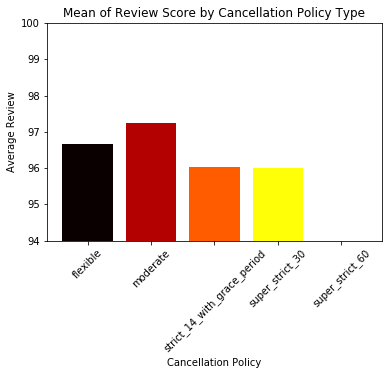

In [11]:
#calculate values. Y values are average reviews, so pull from review score. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_policy = cancel_review["cancellation_policy"]
y = cancel_review["review_scores_rating"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors, align="center")
plt.xticks(x_axis, cancel_rate_policy,rotation=45)

#label chart
plt.title("Mean of Review Score by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Average Review")
plt.ylim(94, 100)

Text(0,0.5,'Host Count')

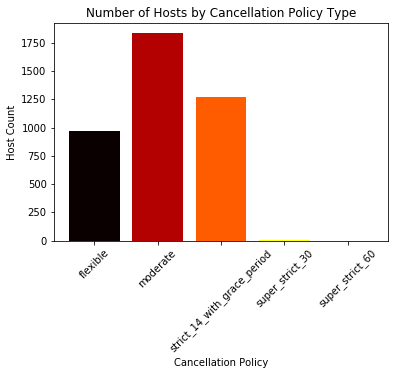

In [12]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_count = cancel_review_count["cancellation_policy"]
y = cancel_review_count["id"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, cancel_rate_count,rotation=45)

#label chart
plt.title("Number of Hosts by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Host Count")

Text(0,0.5,'Reviews Count')

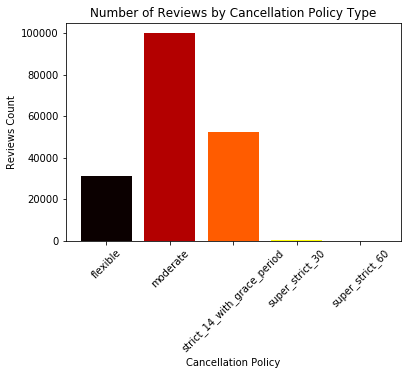

In [13]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_sum = cancel_sum["cancellation_policy"]
y = cancel_sum["number_of_reviews"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, cancel_rate_sum,rotation=45)

#label chart
plt.title("Number of Reviews by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Reviews Count")

In [16]:
#guests included; is business travel ready, reviews vs average nightly price

business_group = master_df.groupby(['is_business_travel_ready'])
# Aggregate it
aggregated_df = business_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df.head()

,is_business_travel_ready,review_scores_rating,host_id,number_of_reviews
0,f,96.720412,4084,4084


In [18]:

super_group = master_df.groupby(['host_is_superhost'])
# Aggregate it
aggregated_df = super_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df.head()

,host_is_superhost,review_scores_rating,host_id,number_of_reviews
0,f,95.639175,2136,2136
1,t,97.905496,1948,1948


(94, 100)

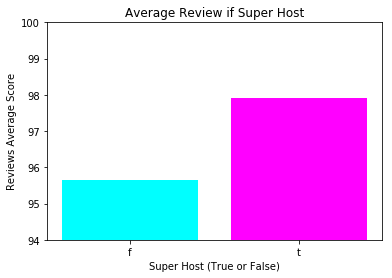

In [21]:
y = summary_df["review_scores_rating"]
x_labels = summary_df["host_is_superhost"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.cool
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels)

#label chart
plt.title("Average Review if Super Host")
plt.xlabel("Super Host (True or False)")
plt.ylabel("Reviews Average Score")
plt.ylim(94, 100)

In [34]:
name_group = master_df.groupby(['host_name'])
# Aggregate it
aggregated_df = name_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df = summary_df.sort_values("host_id",ascending = False)
summary_df.head()

#find_jill = summary_df.loc[summary_df["host_name"]=="Jill", :]
#print(find_jill)

,host_name,review_scores_rating,host_id,number_of_reviews
1046,Michael,96.655172,58,58
53,Allison,95.155556,45,45
1358,Stay Alfred,88.000000,42,42
1292,Scott,97.476190,42,42
1285,Sarah,96.527778,36,36


(-1, 11.5)

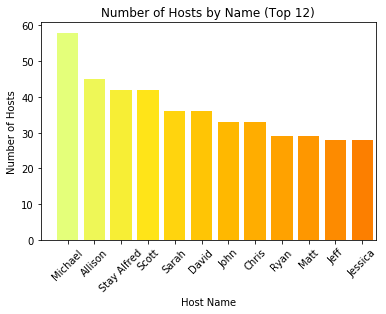

In [45]:
#count of hosts by name

y = summary_df["host_id"]
x_labels = summary_df["host_name"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.Wistia
colors = cmap(np.linspace(0.,1., 12))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels, rotation=45)

#label chart
plt.title("Number of Hosts by Name (Top 12)")
plt.xlabel("Host Name")
plt.ylabel("Number of Hosts")
plt.xlim(-1,11.5)

(80, 100)

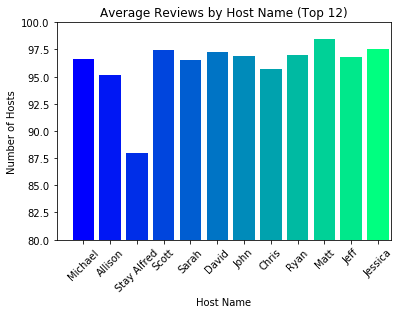

In [43]:
#review of hosts by name

y = summary_df["review_scores_rating"]
x_labels = summary_df["host_name"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.winter
colors = cmap(np.linspace(0.,1., 12))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels, rotation=45)

#label chart
plt.title("Average Reviews by Host Name (Top 12)")
plt.xlabel("Host Name")
plt.ylabel("Number of Hosts")
plt.xlim(-1,11.5)
plt.ylim(80,100)